In [35]:
!pip install matplotlib-scalebar

C:\Users\tobid\AppData\Local\Temp\ipykernel_34944\2349403475.py:16: UserWarning: genfromtxt: Empty input file: "logging\actions-log-2024-10-18-1436.csv"
  rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)


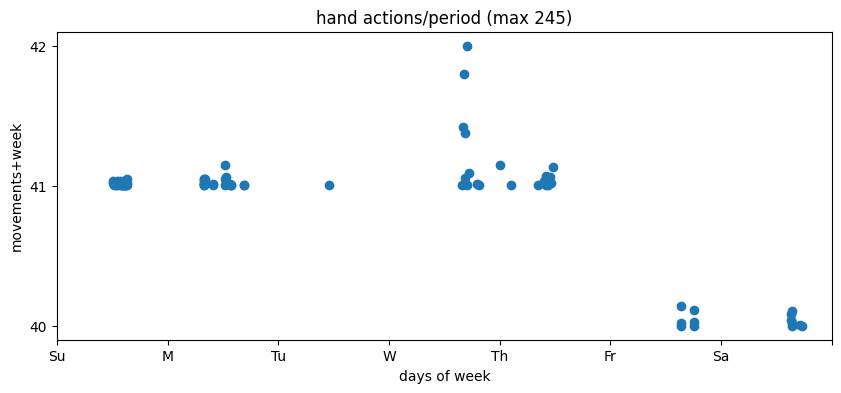

In [38]:
import os
from typing import Union
import matplotlib.pyplot as plt
import csv
from glob import glob
from numpy import genfromtxt
import numpy as np
import matplotlib.ticker as plticker
from matplotlib_scalebar.scalebar import ScaleBar


dir='logging'
data=np.empty((0,6),dtype=int) # year,day_of_year,weekday,hour,minute,museum_movements_this_hour
for f in glob(os.path.join(dir,'*.csv')):
    # print(f'file {f}:')
    rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int)
    # print(row)
    if len(rows.shape)==2 and rows.shape[0]>1: # has more than 1 row of data (first row is header that is int-parsed as vector of -1 values)
        if rows.shape[1]==6: # old format, does not have minutes_since_last
            data=np.append(data,rows[1:,:],axis=0)
        elif rows.shape[1]==7: # new format
            idx=[0,1,2,3,4,6]
            data=np.append(data,rows[1:,idx],axis=0)
            
years=data[:,0]
days=data[:,1]
hours=data[:,3]
minutes=data[:,4]
year_frac_days=(days+hours/24.0+minutes/(24.*60)) # fraction of year in days
frac_days=year_frac_days%7 # fraction of week
int_weeks=np.floor(year_frac_days/7) # floored year weeks
start_week=np.min(int_weeks)
moves=data[:,5]
max_moves=np.max(moves)
norm_moves=(moves/max_moves)+int_weeks # shift weeks vertically

fig=plt.figure(figsize=(10,4))
x=frac_days
y=norm_moves
plt.plot(x,y,'o')
plt.xlabel('days of week')
plt.ylabel('movements+week')
plt.xlim([0,7])
plt.title(f'hand actions/period (max {max_moves})')
xticks=plt.gca().get_xticks()
plt.xticks(range(8),['Su','M','Tu','W','Th','Fr','Sa',''])
loc = plticker.MultipleLocator(base=1.0)
plt.gca().yaxis.set_major_locator(loc)
# scalebar = ScaleBar(max_moves, "cm", length_fraction=0.25, rotation='vertical')
# plt.gca().add_artist(scalebar)

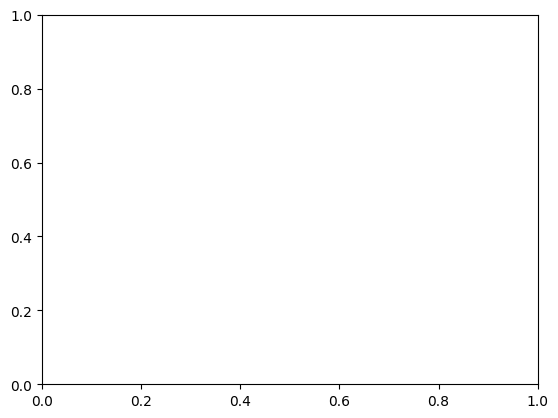

In [27]:
xticks=plt.gca().get_xticks()